In [1]:
from zzd.utils.assess import multi_scores
import numpy as np
import numpy as np
from sklearn import metrics
from matplotlib.ticker import MultipleLocator
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind


#load data

EsmMean_c1_list = []
EsmMean_c1_list_std = []
EsmMean_c2h_list = []
EsmMean_c2h_list_std = []
EsmMean_c2p_list = []
EsmMean_c2p_list_std = []
EsmMean_c3_list = []
EsmMean_c3_list_std = []
for idx_portion in np.hstack(( np.arange(10,100,10),np.arange(100,5120,100),5120)):
    C1223_Xgboost_EsmMean_c1,  C1223_Xgboost_EsmMean_c2h,   C1223_Xgboost_EsmMean_c2p,   C1223_Xgboost_EsmMean_c3= [],[],[],[]
    for i in range(10):
        C1223_Xgboost_EsmMean_c1.append(
            np.genfromtxt(f"./preds/10folds_C1223_Xgboost_ablation_{idx_portion}EsmMean/c1_test_pred_{i}.txt")[:,-2:])
        C1223_Xgboost_EsmMean_c2h.append(
            np.genfromtxt(f"./preds/10folds_C1223_Xgboost_ablation_{idx_portion}EsmMean/c2h_pred_{i}.txt")[:,-2:])
        C1223_Xgboost_EsmMean_c2p.append(
            np.genfromtxt(f"./preds/10folds_C1223_Xgboost_ablation_{idx_portion}EsmMean/c2p_pred_{i}.txt")[:,-2:])  
        C1223_Xgboost_EsmMean_c3.append(
            np.genfromtxt(f"./preds/10folds_C1223_Xgboost_ablation_{idx_portion}EsmMean/c3_pred_{i}.txt")[:,-2:])
    
    mean_score = [multi_scores(C1223_Xgboost_EsmMean_c1[_][:,0],C1223_Xgboost_EsmMean_c1[_][:,1],show=False)  for _ in range(10)]
    EsmMean_c1_list.append(np.mean(mean_score,0)[-1])
    EsmMean_c1_list_std.append(np.std(mean_score,0)[-1])
    
    mean_score = [multi_scores(C1223_Xgboost_EsmMean_c2h[_][:,0],C1223_Xgboost_EsmMean_c2h[_][:,1],show=False)  for _ in range(10)]
    EsmMean_c2h_list.append(np.mean(mean_score,0)[-1])
    EsmMean_c2h_list_std.append(np.std(mean_score,0)[-1])
        
    mean_score = [multi_scores(C1223_Xgboost_EsmMean_c2p[_][:,0],C1223_Xgboost_EsmMean_c2p[_][:,1],show=False)  for _ in range(10)]
    EsmMean_c2p_list.append(np.mean(mean_score,0)[-1])
    EsmMean_c2p_list_std.append(np.std(mean_score,0)[-1])
    
    mean_score = [multi_scores(C1223_Xgboost_EsmMean_c3[_][:,0],C1223_Xgboost_EsmMean_c3[_][:,1],show=False)  for _ in range(10)]
    EsmMean_c3_list.append(np.mean(mean_score,0)[-1])
    EsmMean_c3_list_std.append(np.std(mean_score,0)[-1])
    # break
        
        
EsmMean_c1_list = np.array(EsmMean_c1_list)
EsmMean_c1_list_std = np.array(EsmMean_c1_list_std)
EsmMean_c2h_list = np.array(EsmMean_c2h_list)
EsmMean_c2h_list_std = np.array(EsmMean_c2h_list_std)
EsmMean_c2p_list = np.array(EsmMean_c2p_list)
EsmMean_c2p_list_std = np.array(EsmMean_c2p_list_std)
EsmMean_c3_list = np.array(EsmMean_c3_list)
EsmMean_c3_list_std = np.array(EsmMean_c3_list_std)

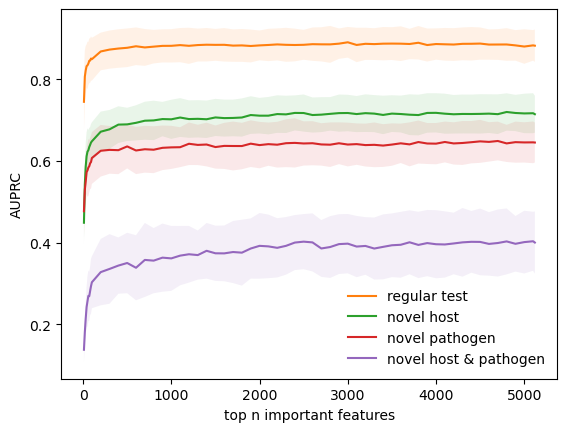

In [16]:
import matplotlib.pyplot as plt
default_color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
                     '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    
plt.plot(np.hstack(( np.arange(10,100,10),np.arange(100,5120,100),5120)),EsmMean_c1_list,label="regular test",color=default_color[1])
plt.fill_between(np.hstack(( np.arange(10,100,10),np.arange(100,5120,100),5120)),
                        EsmMean_c1_list+EsmMean_c1_list_std,
                        EsmMean_c1_list-EsmMean_c1_list_std,
                        facecolor=default_color[1],
                        alpha=0.1)
plt.plot(np.hstack(( np.arange(10,100,10),np.arange(100,5120,100),5120)),EsmMean_c2h_list,label="novel host",color=default_color[2])
plt.fill_between(np.hstack(( np.arange(10,100,10),np.arange(100,5120,100),5120)),
                        EsmMean_c2h_list+EsmMean_c2h_list_std,
                        EsmMean_c2h_list-EsmMean_c2h_list_std,
                        facecolor=default_color[2],
                        alpha=0.1)

plt.plot(np.hstack(( np.arange(10,100,10),np.arange(100,5120,100),5120)),EsmMean_c2p_list,label="novel pathogen",color=default_color[3])
plt.fill_between(np.hstack(( np.arange(10,100,10),np.arange(100,5120,100),5120)),
                        EsmMean_c2p_list+EsmMean_c2p_list_std,
                        EsmMean_c2p_list-EsmMean_c2p_list_std,
                        facecolor=default_color[3],
                        alpha=0.1)

plt.plot(np.hstack(( np.arange(10,100,10),np.arange(100,5120,100),5120)),EsmMean_c3_list,label="novel host & pathogen",color=default_color[4])
plt.fill_between(np.hstack(( np.arange(10,100,10),np.arange(100,5120,100),5120)),
                        EsmMean_c3_list+EsmMean_c3_list_std,
                        EsmMean_c3_list-EsmMean_c3_list_std,
                        facecolor=default_color[4],
                        alpha=0.1)

#plt.vlines(800,0.1,1,linestyles='solid')

plt.xlabel("top n important features")
plt.ylabel("AUPRC")
plt.legend(shadow=False, framealpha=0,)
plt.savefig('pics/Xgboost_EsmMean_ablation1.png', bbox_inches='tight',dpi=800)

In [17]:
idx = 33
print(np.hstack(( np.arange(10,100,10),np.arange(100,5120,100),5120))[idx])
EsmMean_c1_list[idx],EsmMean_c2h_list[idx],EsmMean_c2p_list[idx],EsmMean_c3_list[idx]

2500


(0.884779, 0.717563, 0.6429229999999999, 0.402262)

0.5826032243166992 0.41739678674548486
0.5695318354437404 0.4304682440697434
0.5689403358865093 0.4310596747254749
0.560831208576019 0.4391687321367499
0.533253024736041 0.4667469795595025
0.5604374899148752 0.43956254737713607
0.5488434982680701 0.4511564863678359
0.5694658726652051 0.4305340971704936
0.5595007325064216 0.4404992188574397
0.5596379966518725 0.4403619917402466
-----------
0.5613045218965453 0.43869547587501073


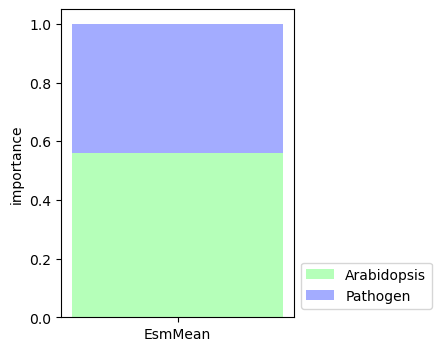

[2308, 2160, 2298, 2240, 2424, 2344, 2322, 2297, 2285, 2296] 2297.4


In [19]:
#(4) load model
import pickle
import numpy as np
zeros_counts = []
arabidopsis_imps,pathogen_imps=[],[]
for foldn in range(10):
    model_file_name = f"../output/model_state/C1223_Xgboost_EsmMean_foldn_{foldn}.pkl"
    with open(model_file_name,"rb") as f:
        model = pickle.load(f)
    
    zeros_counts.append(sum(model.feature_importances_==0))
    
    arabidopsis_imp, pathogen_imp = sum(model.feature_importances_[:2560]),sum(model.feature_importances_[2560:])
    print(arabidopsis_imp,pathogen_imp)
    arabidopsis_imps.append(arabidopsis_imp)
    pathogen_imps.append(pathogen_imp)
    
print("-----------")
print(np.mean(arabidopsis_imps),np.mean(pathogen_imps))

import matplotlib.pyplot as plt
plt.figure(figsize=(3,4))

data = [0.5613045218965453, 0.43869547587501073]

plt.bar([0], data[0],color='#b5ffb9',width=0.3,label="Arabidopsis")
plt.bar([0], data[1],bottom=data[0],color='#a3acff',width=0.3,label="Pathogen")
plt.xlabel('')
plt.ylabel('importance')
plt.title('')
plt.xticks([0], ['EsmMean'])
plt.legend(bbox_to_anchor=(1, 0.2))
plt.savefig('pics/Xgboost_EsmMean_ablation2.png', bbox_inches='tight',dpi=600)
plt.show()

print(zeros_counts,np.mean(zeros_counts))

/home/v/miniconda3/lib/python3.9/site-packages/seaborn/rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/home/v/miniconda3/lib/python3.9/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/home/v/miniconda3/lib/python3.9/site-packages/seaborn/cm.py:1582: MatplotlibDeprecationWarning: The register_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps.register(name)`` instead.
  mpl_cm.register_cmap(_name, _cmap)
/home/v/miniconda3/lib/python3.9/site-packages/seaborn/cm.py:1583: MatplotlibDeprecationWarning: The register_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps.register(name)`` instead.
  mpl_cm.register_cmap(_name + "_r", 

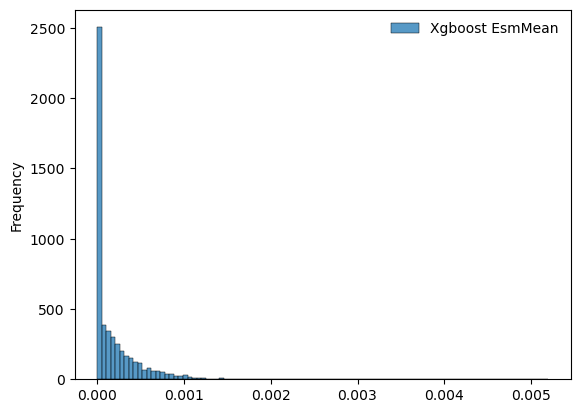

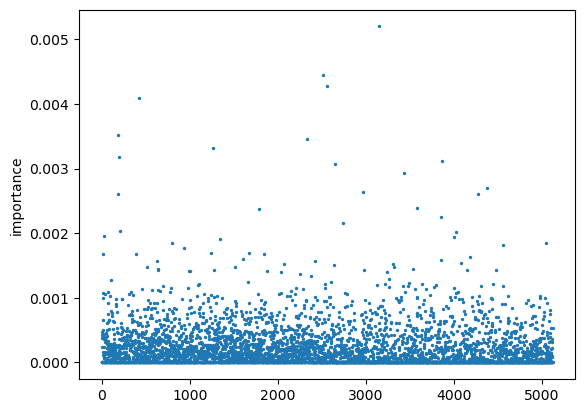

In [18]:
import pickle
model_file_name = f"../output/model_state/C1223_Xgboost_EsmMean_foldn_{0}.pkl"
with open(model_file_name,"rb") as f:
    model = pickle.load(f)
    
        
import seaborn as sns
sns.histplot(model.feature_importances_, bins=100,label="Xgboost EsmMean")
# sns.distplot(imp_b, bins=100,kde=True,label="Effector ESM2 feature")

plt.legend(framealpha=0)
plt.title("")
plt.ylabel("Frequency")
plt.savefig("../output/pics/Xgboost_EsmMean_features_hist_importance.png",dpi =600)
plt.show()

plt.scatter(np.arange(len(model.feature_importances_)), model.feature_importances_, s=2)
plt.title("")
plt.ylabel("importance")
plt.savefig("../output/pics/Xgboost_EsmMean_scatter_importance.png",dpi =600)
